# Importing the Necessary Packages

In [1]:
import mlflow
import shap
import lime
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import os, sys
import warnings
warnings.filterwarnings('ignore')

c:\Users\Blen\OneDrive\Desktop\10Academy\FraudDetection\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Setting the Path for the Script

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from preprocessing import load_data, feature_target_split, train_test_split_data
from model_training import random_forest_model, gradient_boosting_model, mlp_model, lstm_model
from mlops_utils import log_experiment_results

GPU device not found. Using CPU.


# Loading the Data

In [4]:
filepath1 = r'C:\Users\Blen\OneDrive\Desktop\10Academy\FraudDetection\data\scaled_creditcard_data.csv'
filepath2 = r'C:\Users\Blen\OneDrive\Desktop\10Academy\FraudDetection\data\scaled_fraud_data.csv'

In [5]:
creditcard_data, fraud_data = load_data(filepath1, filepath2)

In [24]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [25]:
fraud_data.head()

,purchase_value,age,class,lower_bound_ip_address,upper_bound_ip_address,transaction_time_diff(hours),hour_of_day,day_of_week,month_of_year,browser_FireFox,browser_IE,browser_Opera,browser_Safari,source_Direct,source_SEO,sex_M,country_frequency_normalized
0,0.549607,-0.363124,0,-1.724490,-1.732939,-0.413798,-1.231124,1.487911,0.749993,False,False,False,True,False,True,False,0.031766
1,-1.197335,0.101168,0,-1.724461,-1.732881,-1.180857,1.229002,-0.505034,-1.500438,False,False,False,False,False,True,False,0.005013
2,0.385831,-0.479197,0,-1.724430,-1.732880,-0.936131,1.663142,0.989675,-0.750295,False,True,False,False,False,False,True,0.207377
3,0.986342,-0.363124,0,-1.724355,-1.732790,0.867100,0.650149,0.989675,-0.375223,False,False,False,False,True,False,False,0.207377
4,0.767974,0.449387,0,-1.724340,-1.732760,1.700627,-1.086411,-1.003270,1.875208,False,False,False,False,False,True,False,0.005013


# 1. Working on Fraud Data Prediction

## 1.1 Split fraud dataset into features and target

In [6]:
X_fraud, y_fraud = feature_target_split(fraud_data, 'class')

## 1.2 Split the fraud data into train and test sets

In [7]:
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split_data(X_fraud, y_fraud)

## 1.3 Preprocess and split credit card dataset

In [8]:
X_credit, y_credit = feature_target_split(creditcard_data, 'Class')

In [9]:
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split_data(X_credit, y_credit)

# 1.4 Start MLflow experiment

In [10]:
mlflow.set_experiment("Fraud Detection Model Comparison")

<Experiment: artifact_location='file:///c:/Users/Blen/OneDrive/Desktop/10Academy/FraudDetection/notebooks/mlruns/883479795960385366', creation_time=1729618962326, experiment_id='883479795960385366', last_update_time=1729618962326, lifecycle_stage='active', name='Fraud Detection Model Comparison', tags={}>

# 2. Train models on the fraud dataset

## 2.1 Random Forest Model on Fraud Data

Training Random Forest on Fraud Data...
Random Forest Accuracy: 0.9569
Random Forest Precision: 1.0000
Random Forest F1 Score: 0.6994
Random Forest ROC AUC: 0.7689
Random Forest Confusion Matrix:
 [[23422     0]
 [ 1113  1295]]


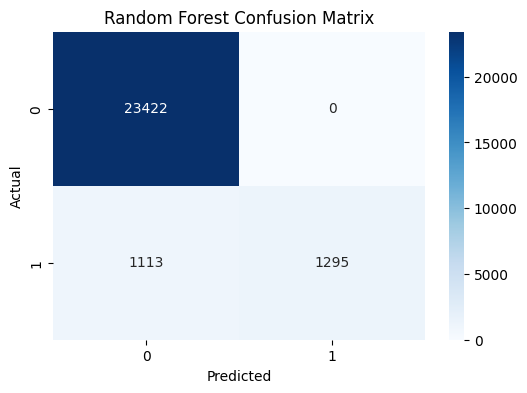

2024/10/22 22:40:19 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/10/22 22:40:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [14]:
print("Training Random Forest on Fraud Data...")
rf_model_fraud = random_forest_model(X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud)
log_experiment_results('Random Forest Fraud', y_test_fraud, rf_model_fraud.predict(X_test_fraud))

## 2.2 Gradient Boosting Model on Fraud Data

Training Gradient Boosting on Fraud Data...
Gradient Boosting Accuracy: 0.9569
Gradient Boosting Precision: 1.0000
Gradient Boosting F1 Score: 0.6994
Gradient Boosting ROC AUC: 0.7689
Gradient Boosting Confusion Matrix:
 [[23422     0]
 [ 1113  1295]]


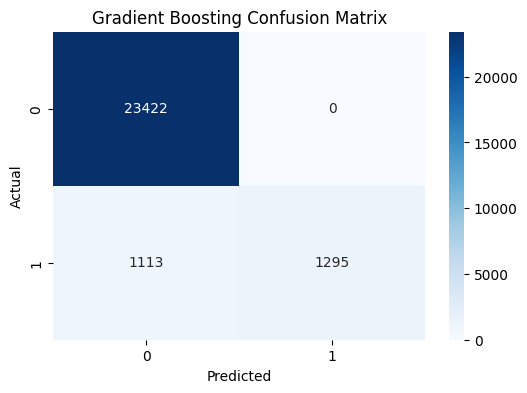

2024/10/22 22:57:24 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/10/22 22:57:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [15]:
print("Training Gradient Boosting on Fraud Data...")
gb_model_fraud = gradient_boosting_model(X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud)
log_experiment_results('Gradient Boosting Fraud', y_test_fraud, gb_model_fraud.predict(X_test_fraud))


## 2.3 Multi-Layer Perceptron (MLP) Model on Fraud Data

Training MLP on Fraud Data...
MLP Accuracy: 0.9551
MLP Precision: 0.9643
MLP F1 Score: 0.6912
MLP ROC AUC: 0.7683
MLP Confusion Matrix:
 [[23374    48]
 [ 1111  1297]]


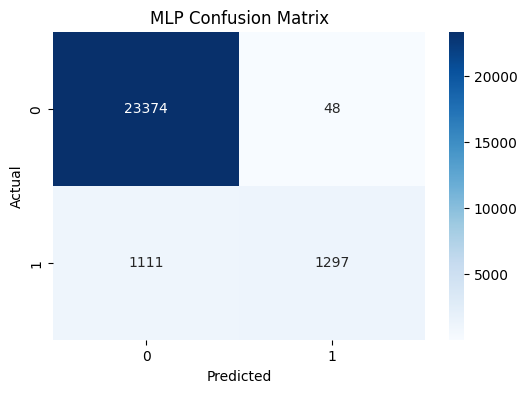

2024/10/22 22:03:39 INFO mlflow.tracking.fluent: Experiment with name 'MLP Fraud' does not exist. Creating a new experiment.
2024/10/22 22:03:39 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/10/22 22:03:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [33]:
print("Training MLP on Fraud Data...")
mlp_model_fraud = mlp_model(X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud)
log_experiment_results('MLP Fraud', y_test_fraud, mlp_model_fraud.predict(X_test_fraud))

## 2.4 LSTM Model on Fraud Data

Data type of X_train_fraud: object
Data type of X_test_fraud: object
Training LSTM on Fraud Data...
Epoch 1/50
2583/2583 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9153 - loss: 0.2986 - val_accuracy: 0.9455 - val_loss: 0.2109
Epoch 2/50
2583/2583 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9439 - loss: 0.2125 - val_accuracy: 0.9476 - val_loss: 0.2023
Epoch 3/50
2583/2583 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9467 - loss: 0.2041 - val_accuracy: 0.9472 - val_loss: 0.1978
Epoch 4/50
2583/2583 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9488 - loss: 0.1988 - val_accuracy: 0.9510 - val_loss: 0.1937
Epoch 5/50
2583/2583 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9503 - loss: 0.1962 - val_accuracy: 0.9509 - val_loss: 0.1923
Epoch 6/50
2583/2583 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9513 - loss: 0.1921 - val_accuracy: 0.9506 - val_loss: 0.1908
Epoch 7/50
2583/2583 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9499 - loss: 0.1979 - val_accuracy: 0.9514 - val_lo

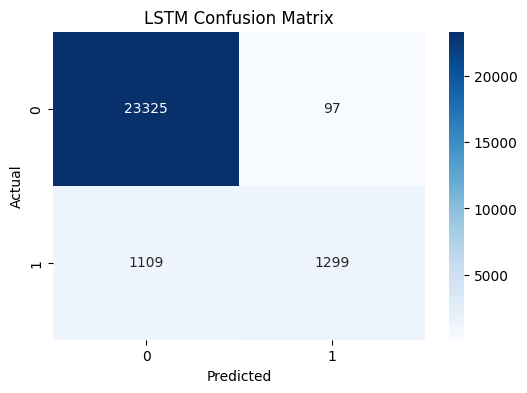

808/808 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


2024/10/22 22:25:14 INFO mlflow.tracking.fluent: Experiment with name 'LSTM Fraud' does not exist. Creating a new experiment.
2024/10/22 22:25:14 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/10/22 22:25:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [12]:
import numpy as np

# Check if the data contains any non-numeric values
print("Data type of X_train_fraud:", X_train_fraud.dtype)
print("Data type of X_test_fraud:", X_test_fraud.dtype)

# Ensure the data is converted to float32 for TensorFlow
X_train_fraud = X_train_fraud.astype(np.float32)
X_test_fraud = X_test_fraud.astype(np.float32)

print("Training LSTM on Fraud Data...")
lstm_model_fraud = lstm_model(X_train_fraud, y_train_fraud, X_test_fraud, y_test_fraud)

# Log experiment results
log_experiment_results('LSTM Fraud', y_test_fraud, 
                       (lstm_model_fraud.predict(X_test_fraud.reshape((X_test_fraud.shape[0], 1, X_test_fraud.shape[1]))) > 0.5).astype("int32"))


# 3. Model Explainability using SHAP

## 3.1 SHAP for Random Forest Fraud Model

In [13]:
print("Generating SHAP explanations for Random Forest Fraud model...")
explainer_rf_fraud = shap.TreeExplainer(rf_model_fraud)
shap_values_rf_fraud = explainer_rf_fraud.shap_values(X_test_fraud)

Generating SHAP explanations for Random Forest Fraud model...


NameError: name 'rf_model_fraud' is not defined